#Project 2: In-Depth Exploratory Data Analysis (EDA)

Netflix Content Analysis 🎬
Project Objective: To perform an in-depth exploratory data analysis of the Netflix dataset. We will explore trends in content production, identify popular genres, analyze content ratings, and understand the distribution of movies and TV shows on the platform. This project builds on foundational EDA by introducing time-series analysis and more complex data cleaning and transformation techniques.

Core Concepts We'll Cover:
* **Data Cleaning & Transformation**: Handling missing values and converting data types (especially dates).
* **Time-Series Analysis**: Analyzing how content has been added to Netflix over the years.
* **Text Data Manipulation**: Parsing and analyzing columns with multiple values, like listed_in (genres) and cast.
* **Geographical & Rating Analysis**: Understanding where content comes from and its maturity level.
* **Feature Engineering**: Creating new, insightful features like 'content age'.
* **Advanced Visualization**: Creating insightful plots to understand distributions and relationships in the data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
sns.set_style("darkgrid")

#Step 2: Data Loading and Initial Inspection
We'll load the `netflix_titles.csv` dataset and perform a high-level overview.


In [ ]:
!git clone "https://github.com/HarshvardhanSingh-13/Datasets"

Cloning into 'Datasets'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 347 (delta 25), reused 0 (delta 0), pack-reused 242 (from 1)
Receiving objects: 100% (347/347), 302.89 MiB | 22.04 MiB/s, done.
Resolving deltas: 100% (139/139), done.
Updating files: 100% (245/245), done.


In [ ]:
df = pd.read_csv("/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df["type"].value_counts()

,count
type,
Movie,5377
TV Show,2410


So `type` is a categorical Column

In [ ]:
df[df['country'] == 'India']
# to check Movies and Tv shows from India

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7764,s7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14,159 min,"Comedies, Dramas, International Movies",Through his relationships with two wildly diff...
7769,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...
7776,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


There are 7787 entries of movies and Tv shows combined.
From that
`director`, `cast`, `country`, `date_added`, `rating` have null values.
* `director` has the most significant number of nulls.


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df["director"]

,director
0,NaN
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic
...,...
7782,Josef Fares
7783,Mozez Singh
7784,NaN
7785,NaN


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


* Only `release_year` has intger in its value. :- dtypes: int64(1)
* But data_added should be `datetime`, but is object(string). So we cant perform time-based analysis until this is corrected.


(this insight from df.info and df.describe)

#Step 3: Data Cleaning and Transformation
this step is critical before analysis to get accuracy.
* we will handle "Null values" and correct the "Data Types"

**Theoretical Concept**: **Data Type Conversion & Handling Nulls**

Data often comes in non-ideal formats. Storing dates as strings, for example, prevents us from extracting components like the year or month, or from plotting data over time. Converting columns to their proper data types (pd.to_datetime, .astype()) is a fundamental preprocessing step.

For null values, we have several strategies:

* **Drop:** If only a very small percentage of rows have missing data, dropping them might be acceptable (.dropna()).
* **Fill/Impute**: Replace missing values with a placeholder (like "Unknown") or a statistical measure (like the mode for categorical data). This is useful when you don't want to lose the other information in those rows.


In [ ]:
# 1. handle missing values in `director` and `cast`
# Since these are text fields and many are missing, we'll fill them with "Unknown."

# df['director'].fillna("Unknown", inplace=True)
# df['cast'].fillna("Unknown", inplace=True)

# or (both the inplcae and = works)

df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")


In [ ]:
df.isnull().sum()
#so director and cast is clear from null values

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df['country'].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


**observe above:**
* that making the NULL to UNKONOWN, will make that category UNKNOWN at the place 3rd. which is a problem, stakeholder will ask why didnt you tackel it. And also it will leave back SOUTH KOREA out of top 5 which is a issue.

* SO, we go with "MODE"(Most offuring value), here it is: the USA. Even after this change it will not make any drastick change the in graphs to be formed.

In [ ]:
#2. Handle missing 'country'
#we'll fill with the mode

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
#3. Drop the few row with missing "date_added" and "rating"
# Since the number is extremly samll(less than 2% of data), dropping them is safe option

df.dropna(subset=['date_added', 'rating'], inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


NOw done with null values.

next thing focus is: date_added is in "string"(difficult to derive) and not "date time formate", that is to be changed.

In [ ]:
df['date_added']

,date_added
0,"August 14, 2020"
1,"December 23, 2016"
2,"December 20, 2018"
3,"November 16, 2017"
4,"January 1, 2020"
...,...
7782,"October 19, 2020"
7783,"March 2, 2019"
7784,"September 25, 2020"
7785,"October 31, 2020"


In [ ]:
#4. Next step is to convert date_added to date time format object
# Use format="mixed" to handle potential variation is date formats

df['date_added'] = pd.to_datetime(df['date_added'], format="mixed", dayfirst=False)
df['date_added']

# Notice the format has chaged from string to datetime object.

,date_added
0,2020-08-14
1,2016-12-23
2,2018-12-20
3,2017-11-16
4,2020-01-01
...,...
7782,2020-10-19
7783,2019-03-02
7784,2020-09-25
7785,2020-10-31


In [ ]:
df.info()
# see the change in this aswell

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [ ]:
#5. Create new feature for year and month added

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
x = df[['year_added', 'month_added']]
print(x)

      year_added  month_added
0           2020            8
1           2016           12
2           2018           12
3           2017           11
4           2020            1
...          ...          ...
7782        2020           10
7783        2019            3
7784        2020            9
7785        2020           10
7786        2020            3

[7770 rows x 2 columns]


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


#Step 4: Exploratory Data Analysis & Visualization


Question that can be asked by the management for you to give from the analysis:

1. What is the distribution of the content type?
2. how have the content been added over time?
3. what is the most popular genres?
4. what is the distribution of content duration?
5. Where does the content come from?
6. What are the maturity ratings of the content?

In [ ]:
#1. What is the distribution of the content type?

df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


In [ ]:
type_counts = df['type'].value_counts()
print(type_counts)
print(type_counts.index)

type
Movie      5372
TV Show    2398
Name: count, dtype: int64
Index(['Movie', 'TV Show'], dtype='object', name='type')


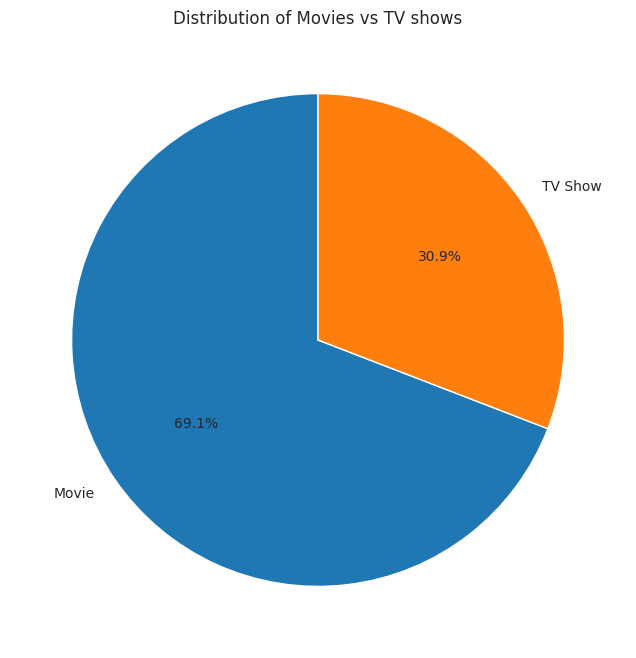

In [ ]:
#creating a plot
plt.figure(figsize=(10,8))
type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies vs TV shows')
plt.show()

In [ ]:
#2. How have the content been added over time?

In [ ]:
df.groupby(['year_added', 'type']).size()

year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         3
2013        Movie         6
            TV Show       5
2014        Movie        19
            TV Show       6
2015        Movie        58
            TV Show      30
2016        Movie       256
            TV Show     184
2017        Movie       861
            TV Show     361
2018        Movie      1255
            TV Show     429
2019        Movie      1497
            TV Show     656
2020        Movie      1312
            TV Show     697
2021        Movie        88
            TV Show      29
dtype: int64

In [ ]:
df.groupby(['year_added', 'type']).size().unstack()

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


NAN meaning here is no release in that year.
so, NAN is actuall 0.

In [ ]:
df.groupby(['year_added', 'type']).size().unstack().fillna(0)

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,0.0
2010,1.0,0.0
2011,13.0,0.0
2012,3.0,0.0
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


Now save this data in a variable and build plot

In [ ]:
content_added_over_time = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
print(content_added_over_time)

type         Movie  TV Show
year_added                 
2008           1.0      1.0
2009           2.0      0.0
2010           1.0      0.0
2011          13.0      0.0
2012           3.0      0.0
2013           6.0      5.0
2014          19.0      6.0
2015          58.0     30.0
2016         256.0    184.0
2017         861.0    361.0
2018        1255.0    429.0
2019        1497.0    656.0
2020        1312.0    697.0
2021          88.0     29.0


<Figure size 1200x800 with 0 Axes>

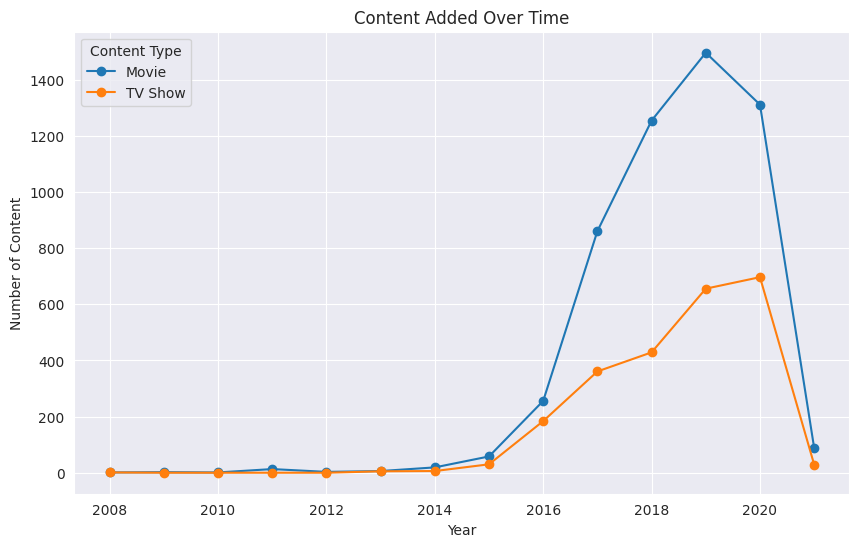

In [ ]:
plt.figure(figsize=(12,8))
content_added_over_time.plot(kind='line', marker = 'o', figsize=(10,6))
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

Key Insights: By seperating movies and tv shows both grew significantly however movies accelerated more and peaked in 2019, while tv shows has been more steady.

And there appear to be addition on content in the year 2020 and 2021, which could be due to COVID 19 pendemic affecting the productions or dataset not being latest.


In [ ]:
#3. what is the most popular genres?

In [ ]:
df['listed_in']


,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


Theoretical Concept: Handling Multi-Value Text Columns
The `listed_in` strings with multiple genres separated by commas. but we need to analyse them indidvidually, so need to transform the data.
A Common technique to do this is 2 step process:
1. **Split** the string in each row into a list of geners
2. **Explode** the Dataframe so that each in the list gener gets its own row, duplicating other information for that titile. therefor allow us to perform `value_counts()` on the geners.

In [ ]:
df['listed_in'].str.split(", ")

,listed_in
0,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,"[Dramas, International Movies]"
2,"[Horror Movies, International Movies]"
3,"[Action & Adventure, Independent Movies, Sci-F..."
4,[Dramas]
...,...
7782,"[Dramas, International Movies]"
7783,"[Dramas, International Movies, Music & Musicals]"
7784,"[Documentaries, International Movies, Music & ..."
7785,"[International TV Shows, Reality TV]"


In [ ]:
df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [ ]:
genres = df.assign(genre = df['listed_in'].str.split(', ')).explode('genre')

In [ ]:
genres

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Music & Musicals
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,International TV Shows
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Reality TV
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Documentaries


In [ ]:
genres['genre']

,genre
0,International TV Shows
0,TV Dramas
0,TV Sci-Fi & Fantasy
1,Dramas
1,International Movies
...,...
7784,Music & Musicals
7785,International TV Shows
7785,Reality TV
7786,Documentaries


In [ ]:
genres['genre'].value_counts()

,count
genre,
International Movies,2437
Dramas,2105
Comedies,1471
International TV Shows,1197
Documentaries,786
Action & Adventure,721
TV Dramas,703
Independent Movies,673
Children & Family Movies,532


In [ ]:
genres['genre'].value_counts().reset_index()

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


In [ ]:
df.columns
#all the colums from df is extracted. similarly do for the above to extract genre and counts

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added'],
      dtype='object')

In [ ]:
top_genres = genres['genre'].value_counts().reset_index()
top_genres.columns = ['Genre', 'Count'] # rename the columns
top_genres

,Genre,Count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


In [ ]:
top_genres.head(15) #extract top 15 genres

,Genre,Count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


In [ ]:
top_15_genre = top_genres.head(15) #extract top 15 genres

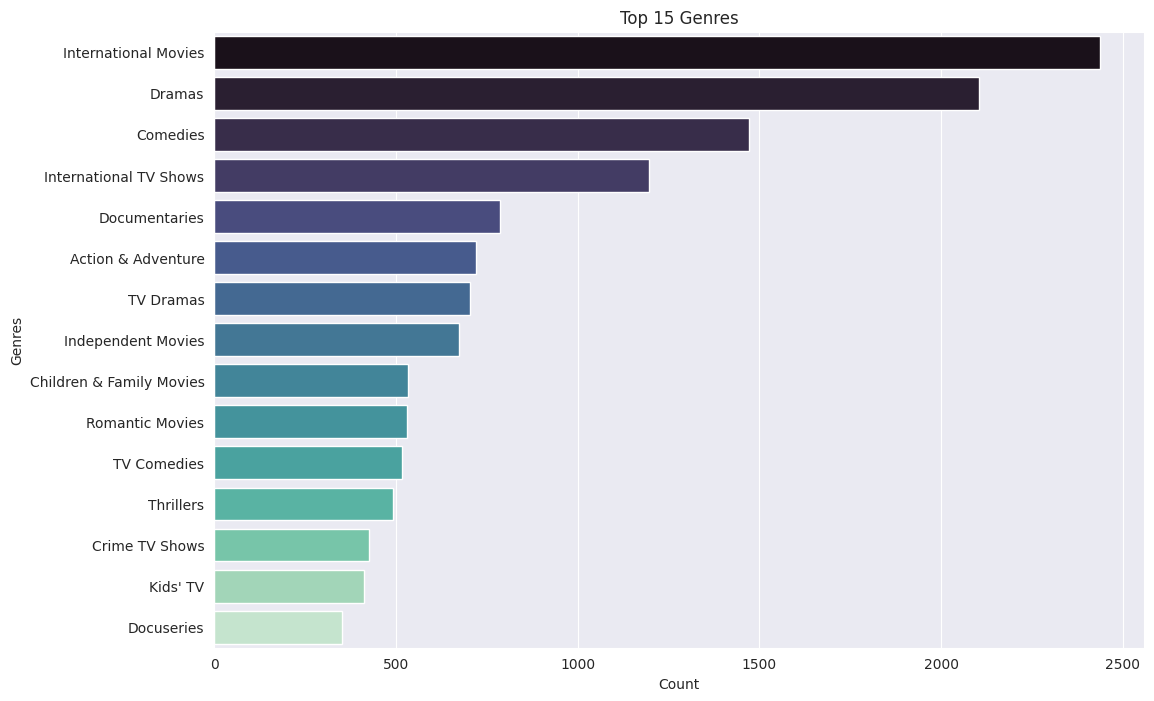

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y= 'Genre', x = 'Count', data=top_15_genre, palette = 'mako', hue= 'Genre',legend = False)
plt.title("Top 15 Genres")
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [ ]:
#4.  what is the distribution of content duration?

notice below:
the content duration is bifercated in two thing: Types and Duration

In [ ]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [ ]:
movies_df = df[df['type'] == 'Movie'].copy()


In [ ]:
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9


In [ ]:
movies_df['duration'] # we have to work on this duarion. Need to split and extract only the integer.
# or better is to replace the " min" with ''(nothing).

,duration
1,93 min
2,78 min
3,80 min
4,123 min
6,95 min
...,...
7781,88 min
7782,99 min
7783,111 min
7784,44 min


In [ ]:
movies_df['duration'].str.replace(' min', '') #but notice the type is "object", so change it to "integer"

,duration
1,93
2,78
3,80
4,123
6,95
...,...
7781,88
7782,99
7783,111
7784,44


In [ ]:
movies_df['duration'].str.replace(' min', '').astype(int) #now put this in a new column

,duration
1,93
2,78
3,80
4,123
6,95
...,...
7781,88
7782,99
7783,111
7784,44


In [ ]:
movies_df['Movie duration'] = movies_df['duration'].str.replace(' min', '').astype(int)
movies_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,Movie duration
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,99
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,111
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,44


In [ ]:
tv_shows_df = df[df['type'] == 'TV Show'].copy() # now the same for tc shows
tv_shows_df['duration'].str.replace(' Seasons', '').str.replace('Season', '').astype(int)

,duration
0,4
5,1
11,1
12,1
16,1
...,...
7767,1
7775,1
7777,2
7779,1


In [ ]:
tv_shows_df['Season'] = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace('Season', '').astype(int)
tv_shows_df['Season'].value_counts().index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 12, 13, 16], dtype='int64', name='Season')

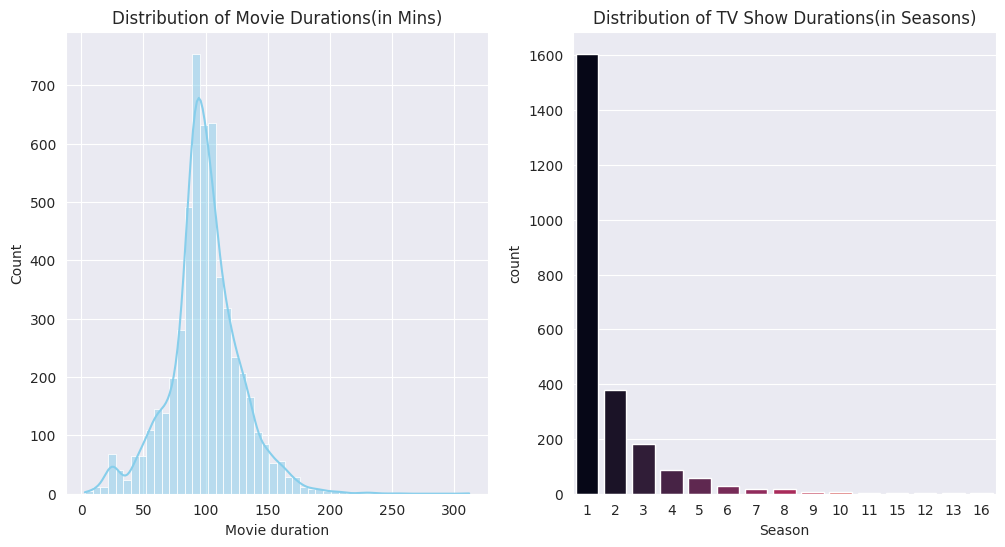

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(12,6))
sns.histplot(ax=axes[0], data=movies_df, x='Movie duration', bins=50, kde=True, color='skyblue').set_title('Distribution of Movie Durations(in Mins)')
sns.countplot(ax=axes[1], data=tv_shows_df, x='Season', palette='rocket', order=tv_shows_df['Season'].value_counts().index, hue='Season', color='lightcoral', legend=False).set_title('Distribution of TV Show Durations(in Seasons)')
plt.show()


Insights:
* The majority of the movies are between 80 to 120 minutes long, which is quite standard.
* The vast majority of Tc show are short-lived, with most having only 1 season. this could a stategy of produtiong many pilots and only renewing the most successful ones, or make it a limited series.

In [ ]:
# Where does the content come from?(Geograpical position)

In [ ]:
df['country']

,country
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States
...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar..."
7783,India
7784,United States
7785,Australia


In [ ]:
Location=df.assign(location = df['country'].str.split(", ")).explode("location")

In [ ]:
Location

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,location
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,Brazil
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,United States
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,Australia
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,United Kingdom
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,Canada


In [ ]:
Location['location']

,location
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States
...,...
7784,United States
7785,Australia
7786,United Kingdom
7786,Canada


In [ ]:
Location['location'].value_counts()

,count
location,
United States,3792
India,990
United Kingdom,721
Canada,412
France,349
...,...
Panama,1
"United Kingdom,",1
Uganda,1


In [ ]:
Location['location'].value_counts().reset_index()

,location,count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
...,...,...
116,Panama,1
117,"United Kingdom,",1
118,Uganda,1
119,East Germany,1


In [ ]:
top_countries = Location['location'].value_counts().reset_index()
top_countries.columns = ["Country", "Count"] # rename column for carity
top_countries

,Country,Count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
...,...,...
116,Panama,1
117,"United Kingdom,",1
118,Uganda,1
119,East Germany,1


In [ ]:
top_countries.head(15)

,Country,Count
0,United States,3792
1,India,990
2,United Kingdom,721
3,Canada,412
4,France,349
5,Japan,285
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154


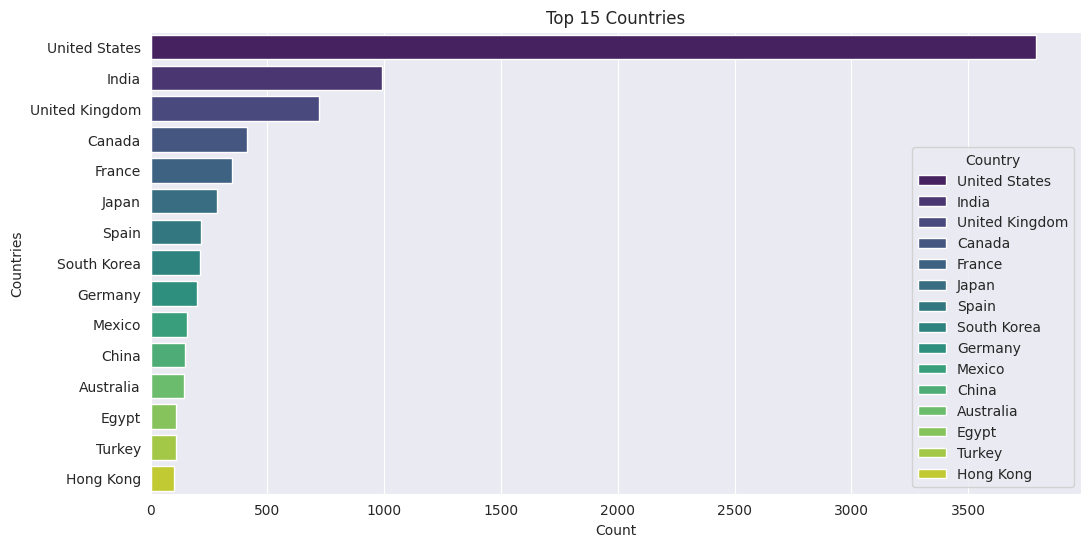

In [ ]:
top_15_countries = top_countries.head(15)

#Now plot the grapg:
plt.figure(figsize=(12,6))
sns.barplot(y='Country', x='Count', data=top_15_countries, palette='viridis', hue ='Country', legend=True)
plt.title("Top 15 Countries")
plt.xlabel('Count')
plt.ylabel('Countries')
plt.show()

* US is by far the largest producer of the content on Netflix.
* India is at 2nd followed by UK at 3rd, Japan at 4th, South Korea at 5th

In [ ]:
#What are the maturity ratings of the content?

In [ ]:
df['rating'].value_counts()

,count
rating,
TV-MA,2861
TV-14,1928
TV-PG,804
R,665
PG-13,386
TV-Y,279
TV-Y7,270
PG,247
TV-G,194


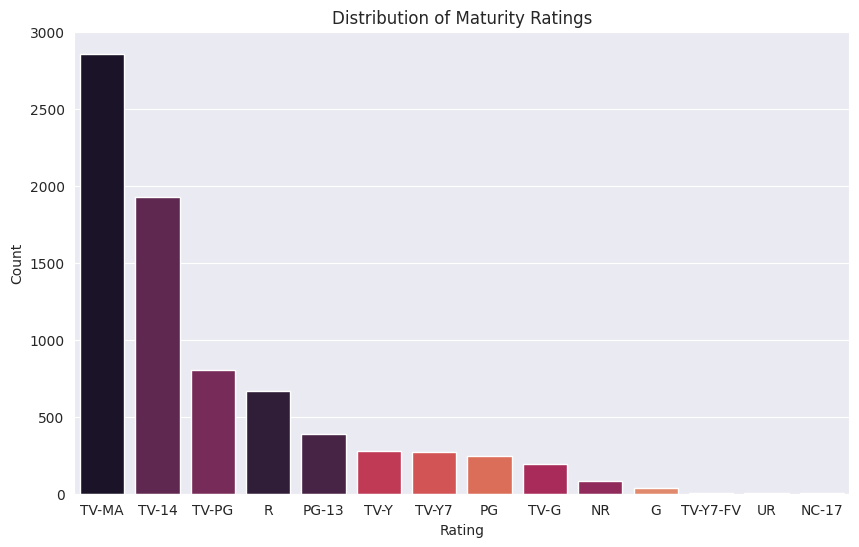

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', palette='rocket', order=df['rating'].value_counts().index, hue='rating', legend=False)
plt.title("Distribution of Maturity Ratings")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()
#

Insight: A large portion of Netflix's content is aimed at mature audiences, with TV-MA (Mature Audience) and TV-14 (Parents Strongly Cautioned) being the two most common ratings. This suggests a focus on adult viewers over content for children (TV-G, TV-Y).

### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals) works.

In [ ]:
df['age_on_netflex'] = df['year_added'] - df['release_year']
df['age_on_netflex'] ## 0 values are netflex originals


,age_on_netflex
0,0
1,0
2,7
3,8
4,12
...,...
7782,15
7783,4
7784,1
7785,1


In [ ]:
content_age = df[df['age_on_netflex'] >=0]
content_age ## will avoid the -ve values


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflex
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,7
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,8
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,15
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,4
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,1
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,1


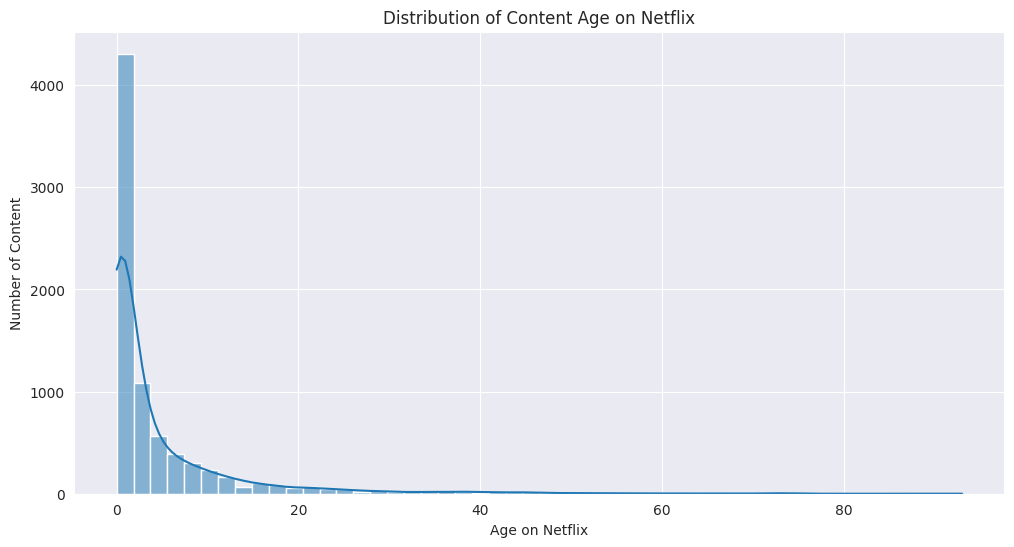

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=content_age, x='age_on_netflex', bins=50, kde=True)
plt.title("Distribution of Content Age on Netflix")
plt.xlabel('Age on Netflix')
plt.ylabel('Number of Content')
plt.show()

**Insight:** The large spike at `0` indicates that a significant amount of content is added in the same year it's released, meaning they are "Netflix Originals." However, there is a very long tail showing that Netflix also heavily invests in acquiring content that can be decades old.


#Step 6: Deeper Mutivariate Analysis

In [ ]:
#Analysis movie duation across different genres
top_genres = genres['genre'].value_counts().index[:5]
genre_movies = genres[(genres['type'] == "Movie") & (genres['genre'].isin(top_genres))].copy()
genre_movies['duration'] = genre_movies['duration'].str.replace(' min', '').astype(int)
genre_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,International Movies
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,1,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,6,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,International Movies
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,Documentaries
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,United States,2020-09-25,2019,TV-MA,44,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,International Movies


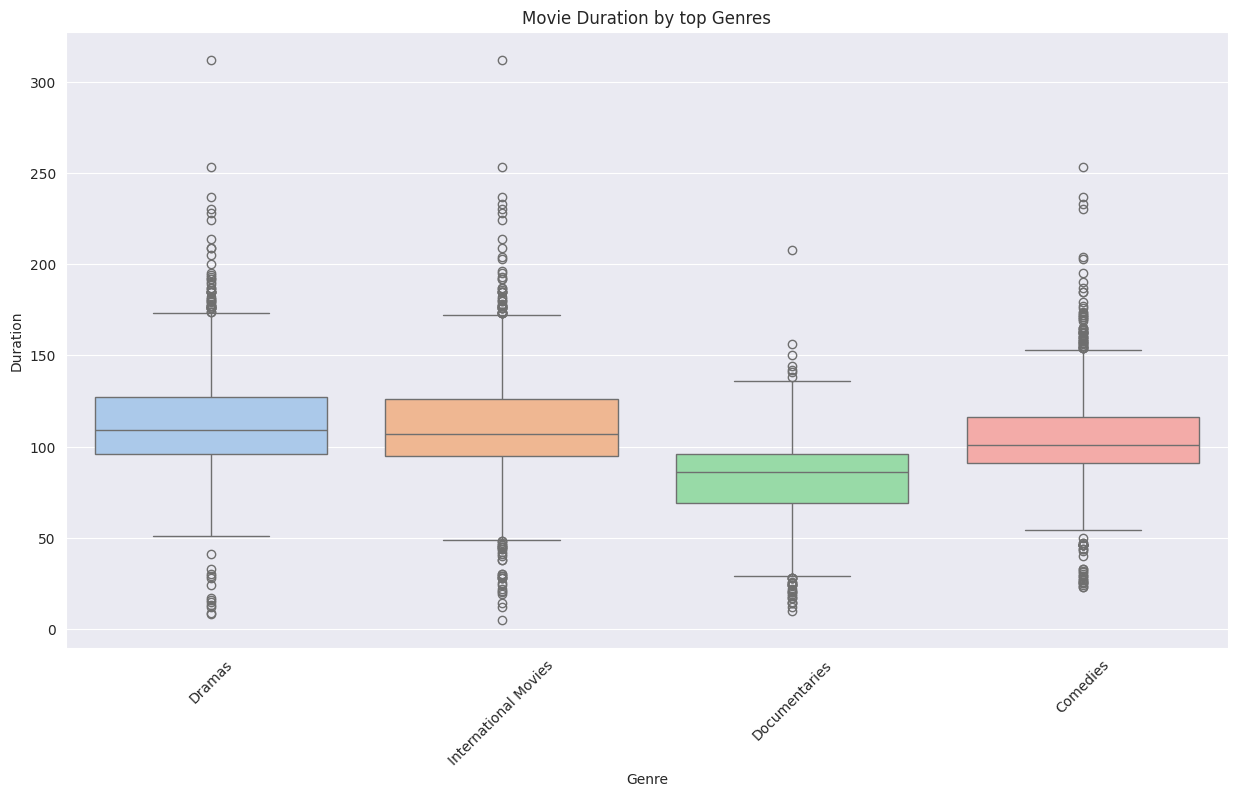

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='genre', y='duration', data=genre_movies, palette='pastel',hue='genre', legend=False)
plt.title("Movie Duration by top Genres")
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.xticks(rotation=45)
plt.show()


Insight: While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

##Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the description column to see what themes and words are most common in Netflix content.

In [ ]:
text = " ".join(df['description'])
text

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive. When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that\'s haunting their jungle island training camp. In a postapocalyptic world, rag-doll robots hide in fear from dangerous machines out to exterminate them, until a brave newcomer joins the group. A brilliant group of students become card-counting experts with the intent of swindling millions out of Las Vegas casinos by playing blackjack. A genetics professor experiments with a treatment for his comatose sister that blends medical and shamanic cures, but unlocks a shocking side effect. After an awful accident, a couple admitted to a grisly hospital are separated and must find each other to escape — before 

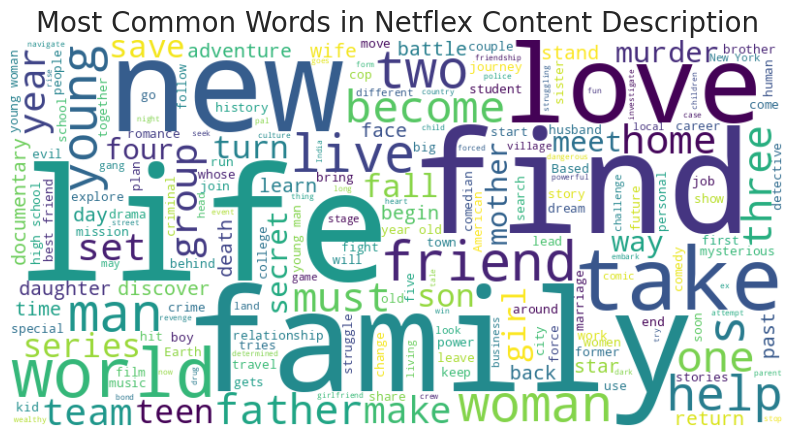

In [ ]:
wordcloud = WordCloud(width = 800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Netflex Content Description", fontsize=20)
plt.show()

Insight: The word cloud highlights common themes and subjects. Words like "life," "family," "love," "young," "friends," and "world" are prominent, suggesting that much of the content revolves around human relationships and personal journeys. Action-oriented words like "find," "secret," and "new" also appear frequently.

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

#Submission Q's
* How has the distribution of content ratings changed over time?
* Is there a relationship between content age and its type (Movie vs. TV Show)?
* Can we identify any trends in content production based on the release year vs. the year added to Netflix?
* What are the most common word pairs or phrases in content descriptions?
* Who are the top directors on Netflix?

# 1.  How has the distribution of content ratings changed over time?

In [ ]:
df.groupby(['year_added','rating']).size()
# df.groupby(['year_added', 'type']).size()

year_added  rating
2008        TV-MA      2
2009        TV-MA      2
2010        NR         1
2011        TV-14      5
            TV-MA      3
                      ..
2021        TV-G       6
            TV-MA     26
            TV-PG      2
            TV-Y       5
            TV-Y7      3
Length: 106, dtype: int64

In [ ]:
df.groupby(['year_added', 'rating']).size().unstack()

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2010,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2013,NaN,NaN,4.0,1.0,NaN,NaN,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
2014,1.0,NaN,NaN,3.0,NaN,NaN,2.0,1.0,12.0,4.0,2.0,NaN,NaN,NaN
2015,1.0,NaN,5.0,2.0,2.0,3.0,15.0,8.0,29.0,8.0,8.0,5.0,2.0,NaN
2016,2.0,1.0,28.0,3.0,6.0,14.0,103.0,9.0,163.0,53.0,11.0,46.0,1.0,NaN


NAN meaning here is no release in that year. so, NAN is actuall 0.

In [ ]:
rating_over_time = df.groupby(['year_added', 'rating']).size().unstack().fillna(0)
print(rating_over_time)

rating         G  NC-17    NR    PG  PG-13      R  TV-14  TV-G  TV-MA  TV-PG  \
year_added                                                                     
2008         0.0    0.0   0.0   0.0    0.0    0.0    0.0   0.0    2.0    0.0   
2009         0.0    0.0   0.0   0.0    0.0    0.0    0.0   0.0    2.0    0.0   
2010         0.0    0.0   1.0   0.0    0.0    0.0    0.0   0.0    0.0    0.0   
2011         0.0    0.0   0.0   0.0    0.0    0.0    5.0   0.0    3.0    5.0   
2012         0.0    0.0   0.0   1.0    0.0    1.0    0.0   0.0    0.0    1.0   
2013         0.0    0.0   4.0   1.0    0.0    0.0    2.0   1.0    3.0    0.0   
2014         1.0    0.0   0.0   3.0    0.0    0.0    2.0   1.0   12.0    4.0   
2015         1.0    0.0   5.0   2.0    2.0    3.0   15.0   8.0   29.0    8.0   
2016         2.0    1.0  28.0   3.0    6.0   14.0  103.0   9.0  163.0   53.0   
2017         4.0    1.0  26.0  20.0   26.0   66.0  339.0  23.0  455.0  177.0   
2018        12.0    0.0  14.0  34.0   55

<Figure size 1200x800 with 0 Axes>

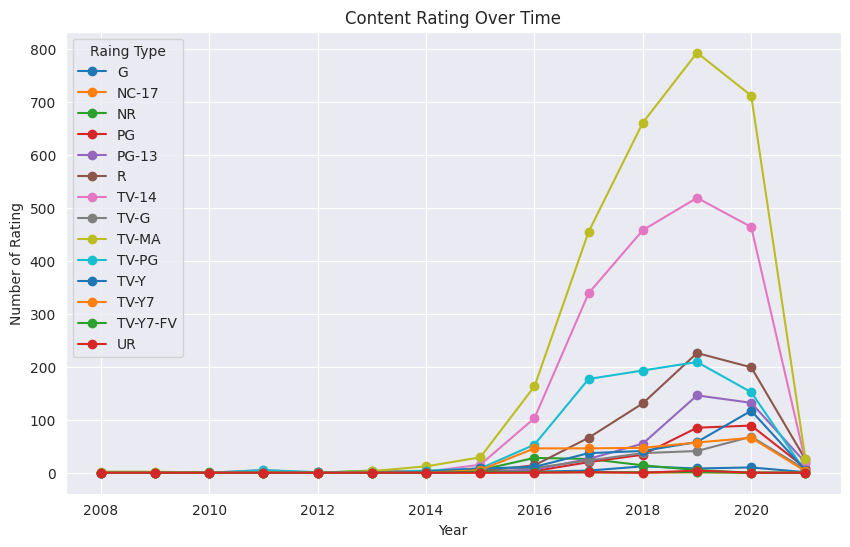

In [ ]:
plt.figure(figsize=(12,8))
rating_over_time.plot(kind='line', marker = 'o', figsize=(10,6))
plt.title('Content Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Rating')
plt.legend(title='Raing Type')
plt.grid(True)
plt.show()


# 2. Is there a relationship between content age and its type (Movie vs. TV Show)?

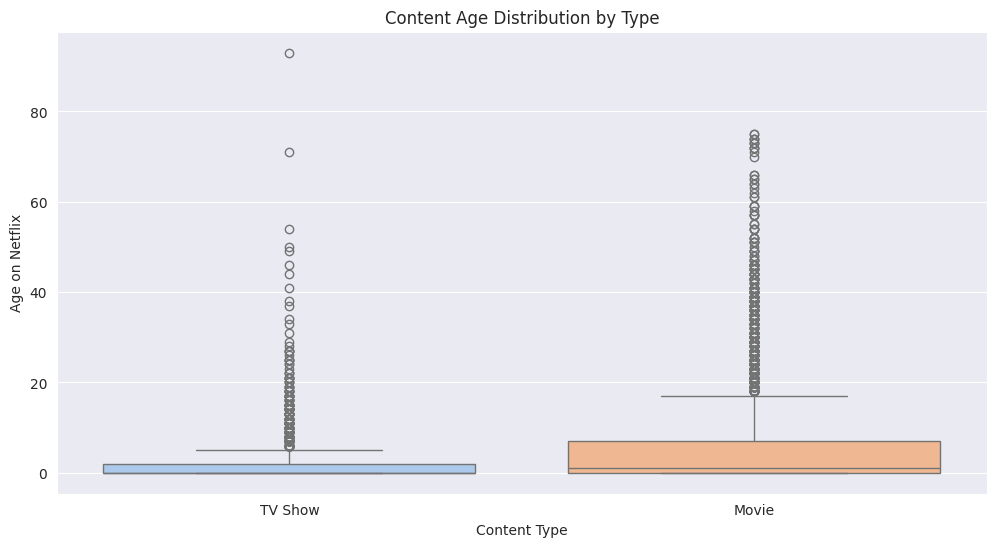

In [ ]:
# df['age_on_netflex'] = df['year_added'] - df['release_year']
# df['age_on_netflex'] ## 0 values are netflex originals

# content_age = df[df['age_on_netflex'] >=0]
content_age ## will avoid the -ve values

plt.figure(figsize=(12,6))
sns.boxplot(x='type', y='age_on_netflex', data=content_age, palette='pastel',hue='type', legend=False)
plt.title('Content Age Distribution by Type')
plt.xlabel('Content Type')
plt.ylabel('Age on Netflix')
plt.show()

#3 Can we identify any trends in content production based on the release year vs. the year added to Netflix?

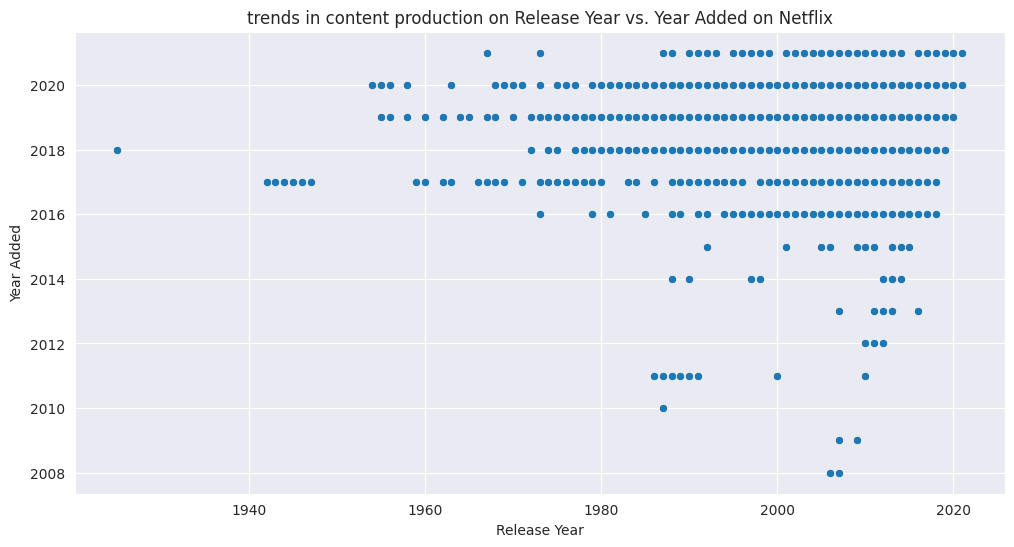

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='release_year', y='year_added' )
plt.title('trends in content production on Release Year vs. Year Added on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.show()

# 4. What are the most common word pairs or phrases in content descriptions?

In [ ]:

word_pairs = df['description'].dropna().tolist()
# What this does:
# Takes the description column from your dataframe
# Removes missing values (NaN)
# Converts everything into a Python list of strings
# ✅ So now you have clean text data ready for processing.


In [ ]:
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
# What this does:
# CountVectorizer converts text into numbers
# ngram_range=(2,2) means:
# Only extract 2-word combinations (bigrams)
# Example: "high school", "serial killer", "new york"
# stop_words='english' removes common useless words like:
# the, is, and, of, to, in
# ✅ This helps you focus on meaningful word pairs.

X= vectorizer.fit_transform(word_pairs)
# What this does:
# Learns all bigrams from your text (fit)
# Converts text into a document-term matrix (transform)
# Rows = descriptions
# Columns = bigrams
# Values = how many times each bigram appears in each description
# ✅ This is how text becomes machine-readable numbers.

In [ ]:
bigrams = vectorizer.get_feature_names_out()
# What this does:
# Returns all the unique word pairs found

counts = X.toarray().sum(axis=0)
# What this does:
# Converts sparse matrix to normal array
# Sums column-wise (axis=0)
# Gives total frequency of each bigram across all descriptions

bigram_df = dict(zip(bigrams, counts))
# What this does:
# Combines:
# - bigram names
# - their total counts
# Creates a dictionary like:
# {
#   'high school': 124,
#   'new york': 98,
#   'serial killer': 76,
#   ...
# }

In [ ]:
wordcloud = WordCloud(width = 800, height=400, background_color='white').generate_from_frequencies(bigram_df)

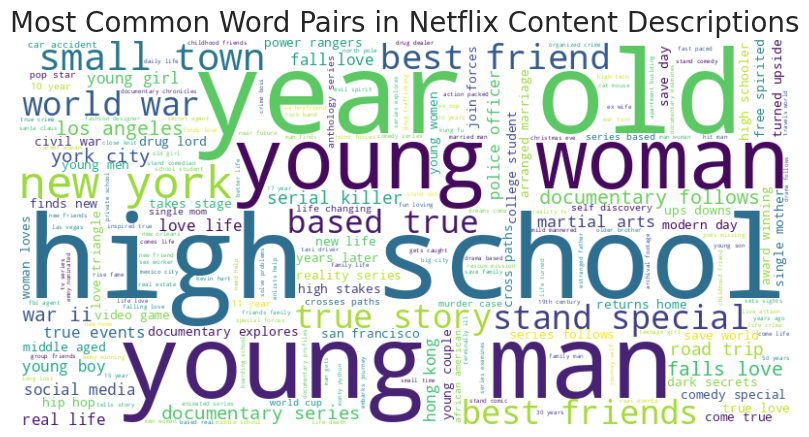

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Word Pairs in Netflix Content Descriptions", fontsize=20)
plt.show()

#6 Who are the top directors on Netflix?

In [ ]:
df['director']

,director
0,Unknown
1,Jorge Michel Grau
2,Gilbert Chan
3,Shane Acker
4,Robert Luketic
...,...
7782,Josef Fares
7783,Mozez Singh
7784,Unknown
7785,Unknown


In [ ]:
df_clean = df[~df['director'].isin(['Unknown'])]
df_clean['director'].value_counts().reset_index()

top_directors= df_clean['director'].value_counts().reset_index()
top_directors.columns = ['Director', 'Count']
top_directors.head(5)

,Director,Count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Martin Scorsese,12
